# PIVOT TABLES

## Download and import data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# import dataset
data = pd.read_excel('manfee_distribution_py_v2.xlsx', sheet_name='hf')
data

,id,region,year,size,fee,fee_range,performance_fee,performance_fee_range
0,The Cypress Partners Master Fund L.P.,Americas (ex. US),1969,NaN,1.50,(1.25-1.5],20.0,(15-20]
1,Leveraged Capital Holdings - Class A,RoW,1969,Large,1.50,(1.25-1.5],3.0,(<=5)
2,Cumberland Partners,US,1970,Small,1.25,(1-1.25],15.0,(10-15]
3,Prescott Associates,US,1973,NaN,1.50,(1.25-1.5],20.0,(15-20]
4,Downtown Associates I,US,1974,Small,1.00,(<=1),20.0,(15-20]
5,Haussmann - Class A,Europe,1974,Large,1.90,(1.75-2],NaN,NaN
6,Elliott Associates - Class B,Americas (ex. US),1977,Large,1.50,(1.25-1.5],20.0,(15-20]
7,Millburn Diversified Program,Americas (ex. US),1977,Large,2.00,(1.75-2],20.0,(15-20]
8,District Capital Management Diversified Program,US,1978,Small,2.00,(1.75-2],20.0,(15-20]
9,Long/Short Selection - Asia - Class I USD,Europe,1979,Small,1.50,(1.25-1.5],NaN,NaN


In [42]:
# set us also for north america etc
data.loc[(data['region']=='Americas (ex. US)'), 'region'] = 'US'

In [51]:
# create regional datasets
us = data.loc[data['region']=='US']
eu = data.loc[data['region']=='Europe']
row = data.loc[data['region']=='RoW']

In [98]:
# sort data
us_sorted = pd.DataFrame.sort_values(us, by='fee')
eu_sorted = pd.DataFrame.sort_values(eu, by='fee')
row_sorted = pd.DataFrame.sort_values(row, by='fee')

plot quick histograms

1 performance in eu: 
 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83c2a07f0>
 2 performance in us: 
 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83c2f7908>
 3 performance in row: 
 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83cc47828>


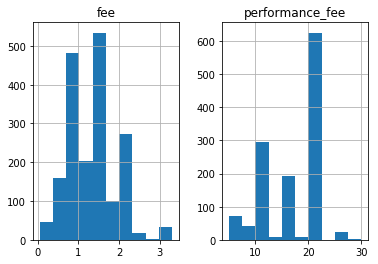

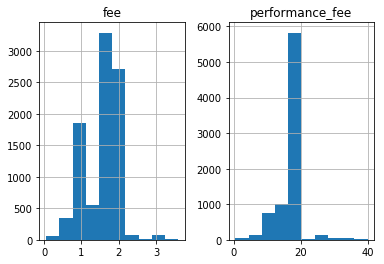

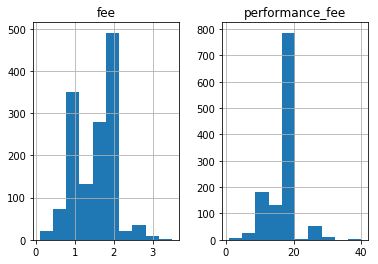

In [99]:
print('1 performance in eu: \n', eu.hist(['fee','performance_fee']),
     '\n 2 performance in us: \n', us.hist(['fee','performance_fee']),
     '\n 3 performance in row: \n', row.hist(['fee','performance_fee']))

create pivot tables for us, eu and row

In [138]:
fee_perfee_by_size_us = us_sorted.pivot_table(values=['fee','performance_fee'], index='size', aggfunc= np.mean) 
fee_perfee_by_year_us = us_sorted.pivot_table(values=['fee','performance_fee'], index='year', aggfunc= np.mean) 
print(fee_perfee_by_size_us, "\n\n", fee_perfee_by_year_us[14:])

             fee  performance_fee
size                             
Large   1.507764        18.028033
Medium  1.494491        17.740222
Small   1.544198        18.348194 

            fee  performance_fee
year                           
1991  1.525000        15.500000
1992  1.255882        14.714286
1993  1.548333        18.653846
1994  1.473684        17.062500
1995  1.369388        16.858974
1996  1.383696        18.863636
1997  1.452895        18.738806
1998  1.521867        19.445312
1999  1.362655        17.808824
2000  1.447172        18.620301
2001  1.386563        17.758503
2002  1.469149        17.962441
2003  1.492624        18.280392
2004  1.472257        17.750708
2005  1.490142        18.061182
2006  1.535867        18.519770
2007  1.561149        18.520576
2008  1.581444        18.724939
2009  1.585335        18.347248
2010  1.560890        18.685012
2011  1.547943        18.485769
2012  1.530207        18.140766
2013  1.560383        18.096183
2014  1.541790        18.23

In [137]:
fee_perfee_by_size_eu = eu_sorted.pivot_table(values=['fee', 'performance_fee'], index='size', aggfunc=np.mean) 
fee_perfee_by_year_eu = eu_sorted.pivot_table(values=['fee', 'performance_fee'], index='year', aggfunc=np.mean) 
print(fee_perfee_by_size_eu, "\n\n", fee_perfee_by_year_eu[14:])

             fee  performance_fee
size                             
Large   1.337004        15.856452
Medium  1.304848        14.616438
Small   1.408289        15.400000 

            fee  performance_fee
year                           
2000  1.426190        13.214286
2001  1.331071        12.368421
2002  1.379024        15.940000
2003  1.241778        10.625000
2004  1.329851        13.618421
2005  1.393273        14.828571
2006  1.386351        15.500000
2007  1.364455        16.205357
2008  1.435648        15.843750
2009  1.462234        15.437500
2010  1.544194        16.447368
2011  1.318657        17.013889
2012  1.330069        15.728155
2013  1.273688        16.233333
2014  1.181549        16.631579
2015  1.183981        16.347134
2016  1.344145        17.347619
2017  1.295372        15.151613


In [139]:
fee_perfee_by_size_row = row_sorted.pivot_table(values=['fee', 'performance_fee'], index='size', aggfunc=np.mean) 
fee_perfee_by_year_row = row_sorted.pivot_table(values=['fee', 'performance_fee'], index='year', aggfunc=np.mean) 
print(fee_perfee_by_size_row, "\n\n", fee_perfee_by_year_row[14:])

             fee  performance_fee
size                             
Large   1.430761        17.358071
Medium  1.528127        16.585118
Small   1.532542        18.754128 

            fee  performance_fee
year                           
2000  1.700000        16.666667
2001  1.270000        16.089286
2002  1.483000        15.000000
2003  1.441786        18.461538
2004  1.452632        17.157143
2005  1.465000        18.389831
2006  1.515667        16.985370
2007  1.667534        18.773077
2008  1.467529        18.119718
2009  1.623418        17.888889
2010  1.503774        18.557692
2011  1.484526        17.696203
2012  1.487900        18.551724
2013  1.603830        18.705357
2014  1.530116        18.464196
2015  1.473030        17.313659
2016  1.546869        16.598765
2017  1.377167        18.160000


Compute an additional column that is the ratio

NB you can plot the ratio below and see how it evolves over time

In [145]:
fee_perfee_by_year_us['pf/f'] = (fee_perfee_by_year_us['performance_fee']/fee_perfee_by_year_us['fee']).round(1) 
fee_perfee_by_year_eu['pf/f'] = (fee_perfee_by_year_eu['performance_fee']/fee_perfee_by_year_eu['fee']).round(1) 
fee_perfee_by_year_row['pf/f'] = (fee_perfee_by_year_row['performance_fee']/fee_perfee_by_year_row['fee']).round(1) 

fee_perfee_by_year_us[['fee','performance_fee','pf/f']]
fee_perfee_by_year_eu[['fee','performance_fee','pf/f']]
fee_perfee_by_year_row[['fee','performance_fee','pf/f']]

,fee,performance_fee,pf/f
year,,,
1969,1.500000,3.000000,2.0
1985,2.000000,20.000000,10.0
1988,2.000000,20.000000,10.0
1989,2.000000,20.000000,10.0
1990,1.925000,12.500000,6.5
1991,1.533333,13.888889,9.1
1992,1.500000,12.500000,8.3
1993,1.250000,18.333333,14.7
1994,1.000000,20.000000,20.0


double filter pivot


you get a pivot table per year and per range since 1967

In [177]:
fee_byyear_byrange_us = us_sorted.pivot_table(values='fee',index='year',columns='fee_range', aggfunc=len)
fee_byyear_byrange_eu = eu_sorted.pivot_table(values='fee',index='year',columns='fee_range', aggfunc=len)
fee_byyear_byrange_row = row_sorted.pivot_table(values='fee',index='year',columns='fee_range', aggfunc=len)

In [165]:
fee_byyear_byrange_us

fee_range,(1-1.25],(1.25-1.5],(1.5-1.75],(1.75-2],(<=1),(>2)
year,,,,,,
1969,NaN,1.0,NaN,NaN,NaN,NaN
1970,1.0,NaN,NaN,NaN,NaN,NaN
1973,NaN,1.0,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,1.0,NaN
1977,NaN,1.0,NaN,1.0,NaN,NaN
1978,NaN,NaN,NaN,1.0,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,1.0
1984,NaN,4.0,NaN,NaN,1.0,NaN
1985,NaN,3.0,NaN,1.0,1.0,NaN


plot

Text(0.5,1,'this graph is not informative, take % not absolute')

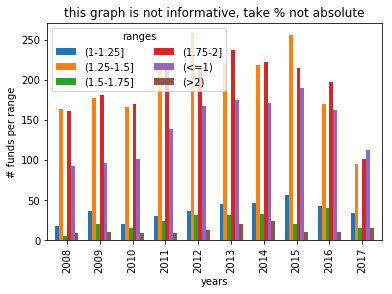

In [172]:
plot_us = fee_byyear_byrange_us[-10:].plot(kind='bar', width=0.7)
plot_us.legend(loc='upper left', ncol=2, title='ranges')
plot_us.set_ylabel('# funds per range')
plot_us.set_xlabel('years')
plot_us.set_title('this graph is not informative, take % not absolute')

Text(0.5,1,'us: this graph is not informative, take % not absolute')

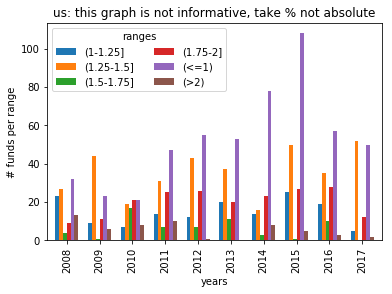

In [173]:
plot_eu = fee_byyear_byrange_eu[-10:].plot(kind='bar', width=0.7)
plot_eu.legend(loc='upper left', ncol=2, title='ranges')
plot_eu.set_ylabel('# funds per range')
plot_eu.set_xlabel('years')
plot_eu.set_title('us: this graph is not informative, take % not absolute')

Text(0.5,1,'us: this graph is not informative, take % not absolute')

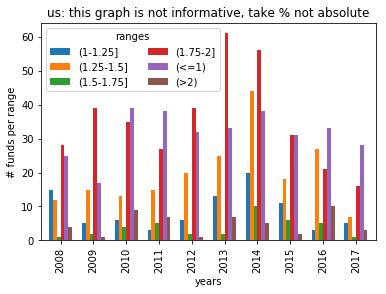

In [174]:
plot_row = fee_byyear_byrange_row[-10:].plot(kind='bar', width=0.7)
plot_row.legend(loc='upper left', ncol=2, title='ranges')
plot_row.set_ylabel('# funds per range')
plot_row.set_xlabel('years')
plot_row.set_title('us: this graph is not informative, take % not absolute')

things to improve:
    1. the range <1 ordered first
    2. plot ratio

now i try not count but others like avg